# DS-SF-23 | Codealong 08 | Introduction to Classification

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import neighbors, metrics, grid_search, cross_validation

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

## Review and Activity | Customer Retention Rates

In [2]:
train_df = pd.DataFrame({'t': range(8), 'survival_rate': [1., .869, .743, .653, .593, .551, .517, .491]})

#8 values

In [3]:
train_df

,survival_rate,t
0,1.000,0
1,0.869,1
2,0.743,2
3,0.653,3
4,0.593,4
5,0.551,5
6,0.517,6
7,0.491,7


In [4]:
train_df['y'] = train_df.survival_rate
train_df['x'] = train_df.t

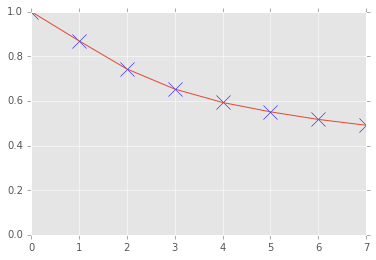

In [5]:
plt.figure()
plt.xlim((0, 7))
plt.ylim((0, 1))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(train_df.x, train_df.y)

NOTES: does not look linear

In [6]:
linear_model = smf.ols(formula = 'y ~ x', data = train_df).fit()

In [11]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     70.91
Date:                Tue, 31 May 2016   Prob (F-statistic):           0.000153
Time:                        20:39:23   Log-Likelihood:                 13.061
No. Observations:                   8   AIC:                            -22.12
Df Residuals:                       6   BIC:                            -21.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9254      0.035     26.258      0.000         0.839     1.012
x             -0.0709      0.008     -8.421      0.000        -0.092    -0.050
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.711
Skew:                           0.310   Prob(JB):                        0.701
Kurtosis:                       1.678   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
linear_model.params

Intercept    0.925417
x           -0.070940
dtype: float64

In [13]:
def linear_y_hat(t):
    return linear_model.params.Intercept + linear_model.params.x * x
    
    #intercept = B0 (intercept) + x * B1(x)

NameError: global name 'x' is not defined

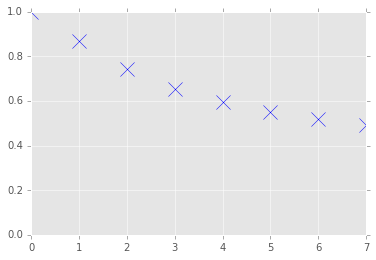

In [14]:
xs = pd.Series(np.linspace(0, 7, 700))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 1))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.legend()

NOTES: can see it's curved so try quadratic model'

In [ ]:
quadratic_model = smf.ols(formula = 'y ~ x', data = train_df).fit()

In [ ]:
quadratic_model.summary()

In [ ]:
def quadratic_y_hat(t):
   return quadratic_model.params[0] \
          + quadratic_model.params[1] * t \
          + quadratic_model.params[2] * (t ** 2)

In [ ]:
xs = pd.Series(np.linspace(0, 7, 700))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 1))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.plot(xs, xs.apply(quadratic_y_hat), label = 'quadratic')
plt.legend()

In [ ]:
def polynomial_y_hat(t):
    return 1.\
           - .100597619 * t \
           - .0596777778 * (t ** 2) \
           + .0380569444 * (t ** 3) \
           - .0101944444 * (t ** 4) \
           + .00153611111 * (t ** 5) \
           - .000127777778 * (t ** 6) \
           + .00000456349206 * (t ** 7)

In [ ]:
xs = pd.Series(np.linspace(0, 7, 700))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 1))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.plot(xs, xs.apply(quadratic_y_hat), label = 'quadratic')
plt.plot(xs, xs.apply(polynomial_y_hat), label = 'polynomial')
plt.legend()

In [ ]:
xs = pd.Series(np.linspace(0, 12, 1200))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 2))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.plot(xs, xs.apply(quadratic_y_hat), label = 'quadratic')
plt.plot(xs, xs.apply(polynomial_y_hat), label = 'polynomial')
plt.axvline(x = 7)
plt.legend()

In [ ]:
test_df = pd.DataFrame({'t': range(8, 13), 'survival_rate': [.468, .445, .427, .409, .394]})

In [ ]:
test_df

In [ ]:
test_df['y'] = test_df.survival_rate
test_df['x'] = test_df.t

In [ ]:
xs = pd.Series(np.linspace(0, 12, 1200))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 2))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.plot(xs, xs.apply(quadratic_y_hat), label = 'quadratic')
plt.plot(xs, xs.apply(polynomial_y_hat), label = 'polynomial')
plt.axvline(x = 7)
plt.scatter(test_df.x, test_df.y, marker = 'x', s = 200)
plt.legend()

In [16]:
test_df['linear_y_hat'] = test_df.x.apply(linear_y_hat)
test_df['quadratic_y_hat'] = test_df.x.apply(quadratic_y_hat)
test_df['polynomial_y_hat'] = test_df.x.apply(polynomial_y_hat)

NameError: name 'test_df' is not defined

In [18]:
test_df.plot(x = 'y', y = 'linear_y_hat')

NameError: name 'test_df' is not defined

In [ ]:
# TODO

In [ ]:
plt.figure()
plt.xlim((test_df.y.min(), test_df.y.max()))
plt.ylim((0, 2))
plt.plot(test_df.y, test_df.y, label = 'y')
plt.plot(test_df.y, test_df.linear_y_hat, label = 'linear_y_hat')
plt.plot(test_df.y, test_df.quadratic_y_hat, label = 'quadratic_y_hat')
plt.plot(test_df.y, test_df.polynomial_y_hat, label = 'polynomial_y_hat')
plt.legend()

## `Iris` dataset

In [19]:
df = pd.read_csv(os.path.join('..', 'datasets', 'iris.csv'))

In [20]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Part A - Activity | Iris Dataset | Exploratory Data Analysis

In [22]:
color = df.Species.map(pd.Series({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}))

convert color - setosa = red; versicolor = green...etc.

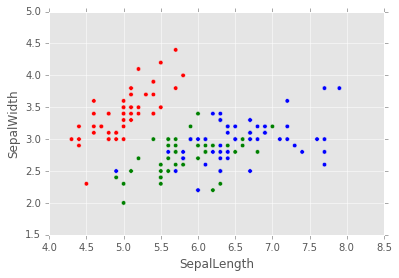

In [28]:
df.plot('SepalLength', 'SepalWidth', kind = 'scatter', c = color)

KeyError: 'PedalLength'

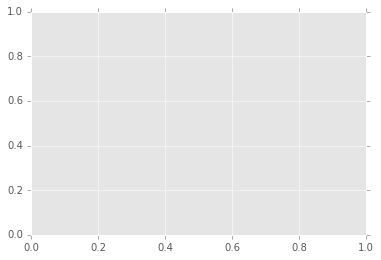

In [29]:
df.plot('SepalLength', 'PedalLength', kind = 'scatter', c = color)

KeyError: 'PedalWidth'

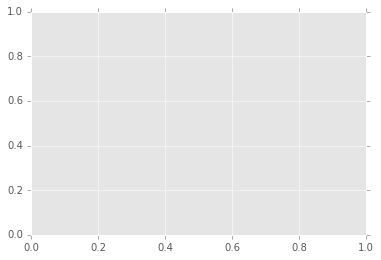

In [27]:
df.plot('SepalWidth', 'PedalWidth', kind = 'scatter', c = color)

In [ ]:
# TODO

In [ ]:
# TODO

## Part B - First hand-coded classifier

In [30]:
def my_first_classifier(row):
    if row.PetalLength < 2:
        return 'Setosa'
    else:
        return 'Versicolor'

In [32]:
y_hat = df.apply(my_first_classifier, axis = 1)

y_hat

0          Setosa
1          Setosa
2          Setosa
3          Setosa
4          Setosa
          ...    
145    Versicolor
146    Versicolor
147    Versicolor
148    Versicolor
149    Versicolor
dtype: object

NOTES: classifies all the Setosa and Versicolor correctly

In [33]:
species_df = pd.DataFrame({'Observed': df.Species, 'Predicted': y_hat})

species_df

,Observed,Predicted
0,Setosa,Setosa
1,Setosa,Setosa
2,Setosa,Setosa
3,Setosa,Setosa
4,Setosa,Setosa
...,...,...
145,Virginica,Versicolor
146,Virginica,Versicolor
147,Virginica,Versicolor
148,Virginica,Versicolor


## Part C - Classification metrics

### Accuracy

In [40]:
species_df.Observed == species_df.Predicted

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
dtype: bool

NOTES: 2/3 WILL BE TRUE

In [43]:
(species_df.Observed == species_df.Predicted).mean()

0.66666666666666663

NOTES: this is the amt that is classified correctly

### Misclassification rate

In [44]:
(species_df.Observed != species_df.Predicted).mean()

0.33333333333333331

NOTES: this is the amt. that is misclassified  



CAN ALWAYS EXPECT 1/2

## Part D - Activity | Second hand-coded classifier

In [47]:
def my_second_classifier(row):
    if row.PetalLength < 2:
        return 'Setosa'
    elif row.PetalLength < 5:
        return 'Versicolor'
    else:
        return 'Virginica'

In [48]:
y_hat = df.apply(my_second_classifier, axis = 1)

In [50]:
sum(y_hat != df.Species)

8

    NOTES: 8 are misclassified

In [52]:
1. * sum(y_hat == df.Species) / len(df)

0.9466666666666667

    NOTES: 95% are correct

## Part E

### Feature matrix and label vector

In [53]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
y = df.Species

In [54]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
y

#species

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

### K-Nearest Neighbors (KNN)

In [58]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model.fit(X, y)

#KNeighborsClassifier
#assign K --> n_neighbors = 5

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
y_hat = model.predict(X)

In [60]:
species_df = pd.DataFrame({'Observed': y, 'Predicted': y_hat})

species_df

,Observed,Predicted
0,Setosa,Setosa
1,Setosa,Setosa
2,Setosa,Setosa
3,Setosa,Setosa
4,Setosa,Setosa
...,...,...
145,Virginica,Virginica
146,Virginica,Virginica
147,Virginica,Virginica
148,Virginica,Virginica


In [62]:
species_df[species_df.Predicted != species_df.Observed]

,Observed,Predicted
70,Versicolor,Virginica
72,Versicolor,Virginica
83,Versicolor,Virginica
106,Virginica,Versicolor
119,Virginica,Versicolor


    NOTES: 5 that are misclassified

In [65]:
sum(species_df.Predicted != species_df.Observed)

#same as above but returning a num

5

You can measure the precision of your prediction either manually or with `.score()`

In [66]:
1. * sum(species_df.Predicted == species_df.Observed) / len(df)

0.9666666666666667

In [68]:
model.score(X, y)

#score returns r2 when doing linerar regression

0.96666666666666667

# weights = 'uniform'

In [69]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').fit(X, y).score(X, y)

0.96666666666666667

# weights = 'distance'

In [70]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(X, y).score(X, y)

1.0

## Part F - What is the best value for `k`?

In [73]:
k = range(1, len(df))
#1 to 149

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(X, y), axis = 1)
#try/evaluate 149 models

models

score_df['Score'] = models.map(lambda model: model.score(X, y))

In [76]:
score_df

,k,Score
0,1,1.000000
1,2,0.980000
2,3,0.960000
3,4,0.960000
4,5,0.966667
...,...,...
144,145,0.600000
145,146,0.580000
146,147,0.580000
147,148,0.560000


    NOTES: if look into 1 neighbor, get everything right; then accuracy down the more neighbors you look at

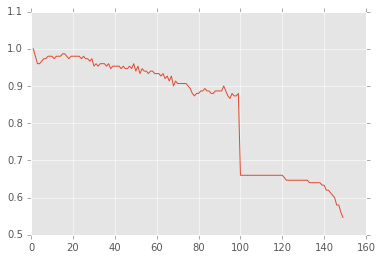

In [77]:
plt.plot(score_df.k, score_df.Score)

    NOTES: cross threshold and merge into the 3rd color (gets your drop)

## Part G - Validation

60% of the dataset to train the model; the rest to test the model

In [ ]:
train_df = df.sample(frac = .6, random_state = 0).sort()

In [ ]:
train_df

In [ ]:
test_df = df.drop(train_df.index)

In [ ]:
test_df

The error in the training set is less than the error is the test set

In [ ]:
train_X = train_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
train_y = train_df.Species

model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model.fit(train_X, train_y)
print 'train = ', model.score(train_X, train_y)

test_X = test_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
test_y = test_df.Species

print 'test  = ', model.score(test_X, test_y)

In [ ]:
k = range(1, len(train_df))

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(train_X, train_y), axis = 1)

score_df['TrainScore'] = models.apply(lambda model: model.score(train_X, train_y))
score_df['TestScore'] = models.apply(lambda model: model.score(test_X, test_y))

In [ ]:
score_df

In [ ]:
score_df.set_index('k').plot()

## Part H - Cross-Validation

In [ ]:
len(train_df)

In [ ]:
k_cv = 5 # 5-fold CV
k_nn = range(1, len(train_df) * (k_cv - 1) / k_cv) # k-NN

gs = grid_search.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn},
    cv = cross_validation.KFold(len(train_df), n_folds = k_cv)
)

gs.fit(train_X, train_y)

score_df = pd.DataFrame({'k': [score.parameters['n_neighbors'] for score in gs.grid_scores_],
    'Score': [score.mean_validation_score for score in gs.grid_scores_]})

score_df

In [ ]:
plt.plot(score_df.k, score_df.Score)

In [ ]:
score_df[score_df.Score == score_df.Score.max()]

In [ ]:
score_df[score_df.Score == score_df.Score.min()]

In [ ]:
gs.score(test_X, test_y)